In [11]:
import os
import numpy as np
import yaml
from matplotlib import pyplot as plt
import open3d as o3d

from Sem_Kitti.Sem_kitti_Dataset import Sem_kitti_Dataset

split = 'train'
directory = 'C:/Users/BYS-PC/Master_BYS/Semantic_Kitti/dataset'
config = 'config/semantic-kitti.yaml'
CFG = yaml.safe_load(open(config, 'r'))
color_dict = CFG["color_map"]
nclasses = len(color_dict)

SemKitti = Sem_kitti_Dataset(directory, nclasses, color_dict, split, project=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
found 19130 for train


In [12]:
id_s = np.random.randint(len(SemKitti))
points, color_sem, data, data_sem, proj_xyz, proj_mask = SemKitti[id_s]

True

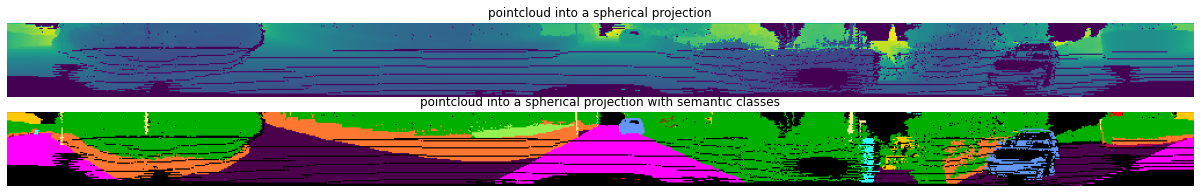

In [14]:
fig = plt.figure(figsize=(30, 3))
rows = 2
columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(data)
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(data_sem)
plt.axis('off')

plt.savefig('projections.png')

geometry = o3d.geometry.PointCloud() 
geometry.points = o3d.utility.Vector3dVector(points)
geometry.colors = o3d.utility.Vector3dVector(color_sem)
o3d.io.write_point_cloud('points.ply',geometry)

geometry = o3d.geometry.PointCloud() 
geometry.points = o3d.utility.Vector3dVector(proj_xyz[proj_mask>0])
geometry.colors = o3d.utility.Vector3dVector(data_sem[proj_mask>0])
o3d.io.write_point_cloud('proj_points.ply',geometry)